## These plots will compare a WRF run where FDDA setting was left blank (FDDA=0) 
https://github.com/wtoslac/LCLUCWRF/blob/main/WRF/namelist.input.Cali.D1only
## and a run where FDDA=1 for the coarse domain (D01) using this namelist file
https://github.com/wtoslac/LCLUCWRF/blob/main/WRF/namelist.input.Cali.D1.FDDA1

## The fine domain is produce using ndown with UCM=1 and bl_pbl_physics = -1 (which is actually =2 with MYJ PBL model)


In [1]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob

In [12]:
## Load the EPA Data Input File
EPAVar = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9
print(len(EPAVar))

### Set the Variable you want to look at. ####
Var = "T2"
VarLabel = "Two-Meter Temperature [°C]"

# === Load all WRF output files ===
data_path0 = "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA0_250518/"  # Update if needed
file_pattern0 = "wrfout_d01_2020-06-*"
data_path1 = "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL2_FDDA1_250710/"  # Update if needed
file_pattern1 = "wrfout_d01_2020-06-*"

718


### Let's compare the time series of T2 temperature from the model to the EPA data.
## EPA Sensor Location
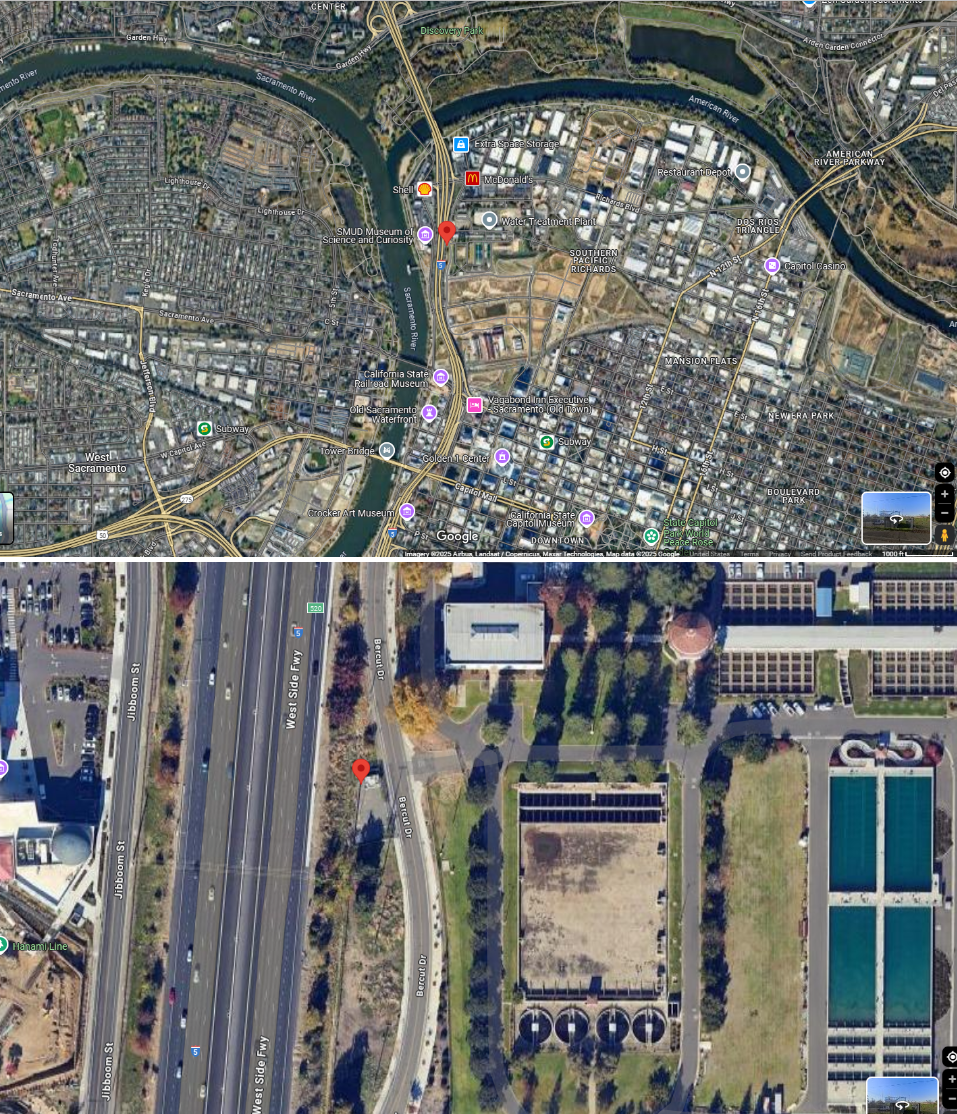


### Let's look at the results for one particular time output but for the entire map
### Compare the difference in the variable with between the run with and without FDDA

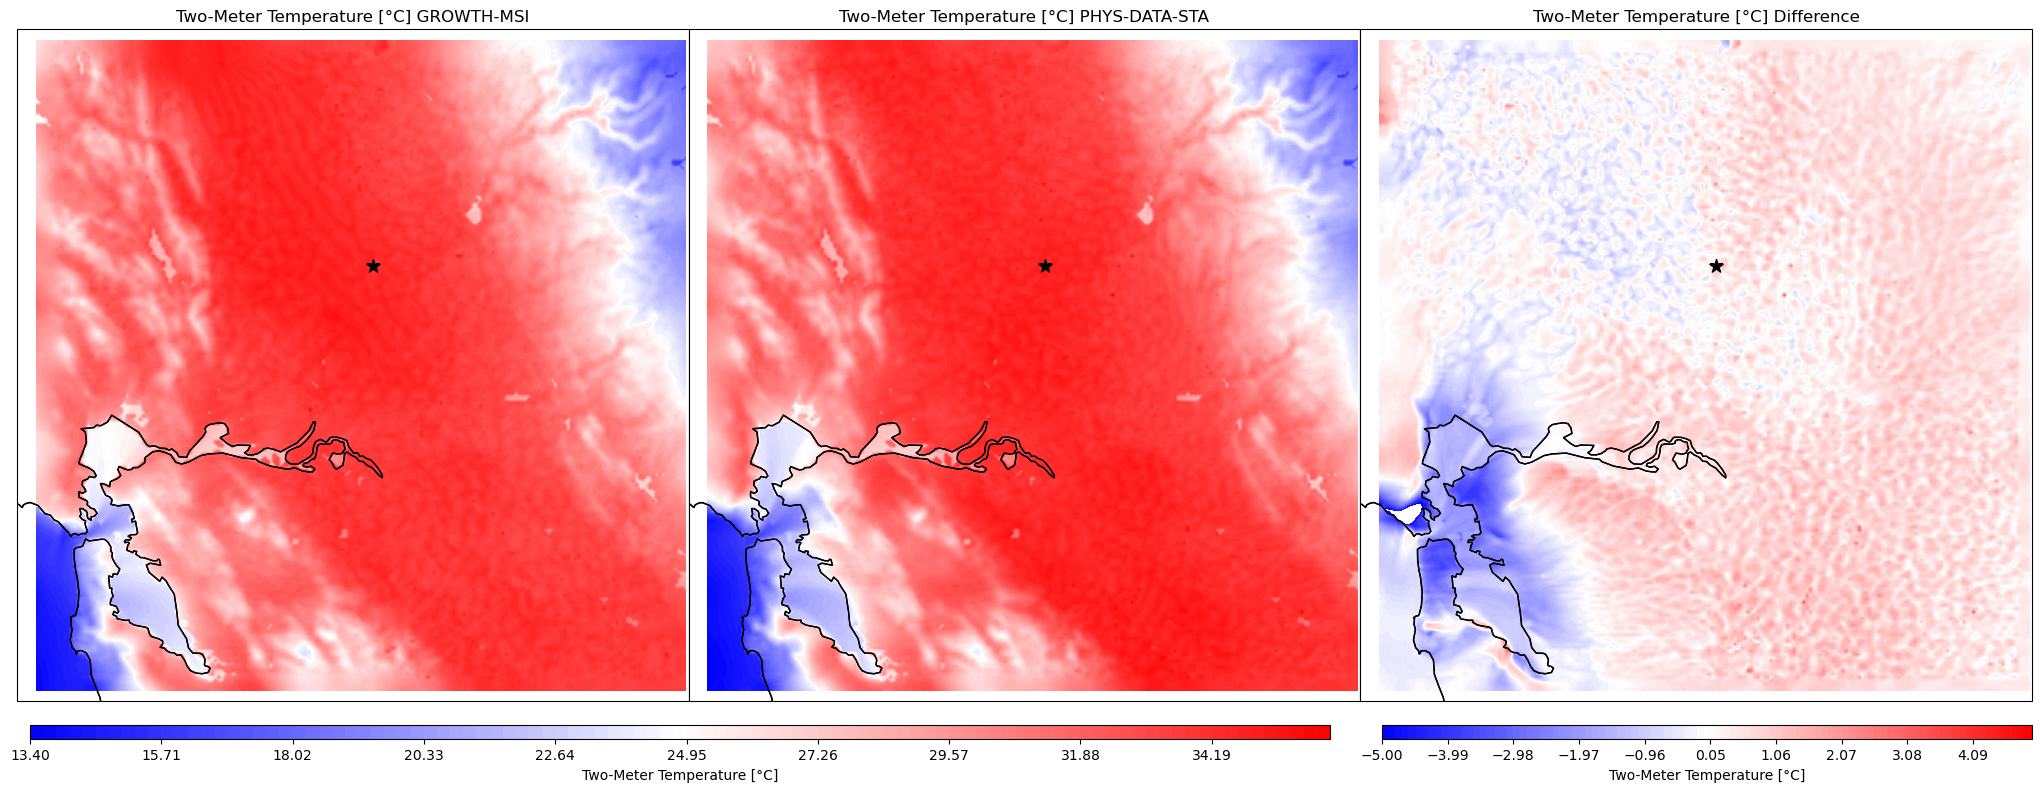

In [7]:
### Load one specific hour of the WRFOUT output
ncfile0 = Dataset(data_path0+"wrfout_d01_2020-06-30_21:00:00")
ncfile1 = Dataset(data_path1+"wrfout_d01_2020-06-30_21:00:00")


### Grab the Variables, long, lats and projections.
Var0 = getvar(ncfile0, Var)
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)
Var0=Var0-273.15
Var1 = getvar(ncfile1, Var)
Var1=Var1-273.15

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.0}, figsize=(26, 9))

# Add shared colorbar spanning only the width of both plots
levels = np.linspace(np.min([to_np(Var0).min(),to_np(Var1).min()]),
                     np.max([to_np(Var0).max(),to_np(Var1).max()]), 100)

#  contour plot for UCM=0
ax0.set_title(VarLabel+ " GROWTH-MSI")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats),to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr",levels=levels) 
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


#  contour plot for UCM=1 
ax1.set_title(VarLabel+ " PHYS-DATA-STA")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="bwr",levels=levels) 
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

cbar_ax1 = fig.add_axes([0.13, 0.08, 0.5, 0.015])  # [left, bottom, width, height]
cbar1 = fig.colorbar(contour0, cax=cbar_ax1, orientation="horizontal")
cbar1.set_label(VarLabel)

#  contour plot for UCM= (1-0)
ax2.set_title(VarLabel+ " Difference")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr",levels=np.linspace(-5,5,100)) 
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
# Add shared colorbar spanning only the width of both plots
cbar_ax2 = fig.add_axes([0.65, 0.08, 0.25, 0.015])  # [left, bottom, width, height]
cbar2 = fig.colorbar(contour2, cax=cbar_ax2, orientation="horizontal")
cbar2.set_label(VarLabel)

plt.show()

### The right plots is the most useful here. The FDDA have a large effect near the Bay area. The plot is FDDA1 - FDDA0. The Bay area has a negative values so that indicates that FDDA0 has a higher temperature for the Bay Area. 
### This is seem previously from comparing to EPA data where the model tends to over predicts previously. 
### This doesn't seems be the case inland where it seems to be some clumps of positive values. North of the Bay Area seems to be negative also.

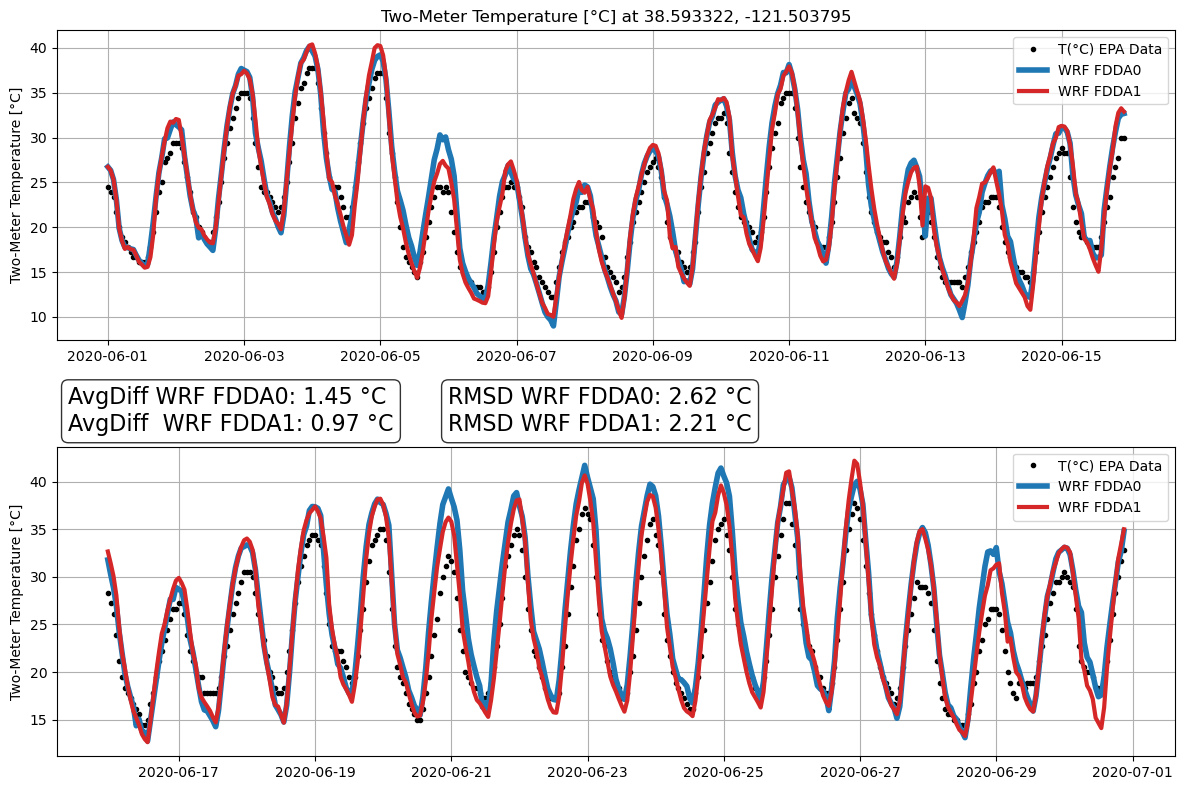

In [15]:
## Loading the data for the whole month #############
files0 = sorted(glob(f"{data_path0}/{file_pattern0}"))
files1 = sorted(glob(f"{data_path1}/{file_pattern1}"))

# === Location of the EPA site===
lat_point = 38.593322
lon_point = -121.503795

# === Use first file to find grid location ===
sample_ds = Dataset(files0[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
Var0_all = []
Var1_all = []
Time_all = []

for ifile in range(0,len(files0)):

    Var0 = getvar(Dataset(files0[ifile]), Var, timeidx=ALL_TIMES) 
    Var0_all.extend(to_np([Var0[y_idx, x_idx] - 273.15]))
    Time_all.append(Var0.Time.values)
    
    Var1 = getvar(Dataset(files1[ifile]), Var, timeidx=ALL_TIMES) 
    Var1_all.extend(to_np([Var1[y_idx, x_idx] - 273.15]))


#### Setup the figures and axes.
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

#### Top subplot (first half)
axs[0].plot(Time_all[0:359], EPAVar[0:359], '.k', label="T(°C) EPA Data")
axs[0].plot(Time_all[0:359], Var0_all[0:359],linewidth=4, label="WRF FDDA0", color='tab:blue')
axs[0].plot(Time_all[0:359], Var1_all[0:359],linewidth=3,  label="WRF FDDA1", color='tab:red')
axs[0].set_ylabel(VarLabel)
axs[0].set_title(VarLabel +" at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(Time_all[359:718], EPAVar[359:718], '.k', label="T(°C) EPA Data")
axs[1].plot(Time_all[359:718], Var0_all[359:718],linewidth=4, label="WRF FDDA0", color='tab:blue')
axs[1].plot(Time_all[359:718], Var1_all[359:718],linewidth=3,  label="WRF FDDA1", color='tab:red')
axs[1].set_ylabel(VarLabel)
#axs[1].set_title(VarLabel +" at 38.593322, -121.503795")
axs[1].grid(True)
axs[1].legend()

# === Add the Mean Difference ======= #
MeanDiff0=np.mean(np.array(Var0_all) - np.array(EPAVar))
MeanDiff1=np.mean(np.array(Var1_all) - np.array(EPAVar))
axs[0].text(0.01, -0.15, 
            f"AvgDiff WRF FDDA0: {MeanDiff0:.2f} °C\nAvgDiff  WRF FDDA1: {MeanDiff1:.2f} °C",
            transform=axs[0].transAxes,
            fontsize=16,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# === Add RMS Deviation to the plot ===
rmsd0=np.sqrt(np.mean((np.array(Var0_all) - np.array(EPAVar)) ** 2))
rmsd1=np.sqrt(np.mean((np.array(Var1_all) - np.array(EPAVar)) ** 2))
axs[0].text(0.35, -0.15, 
            f"RMSD WRF FDDA0: {rmsd0:.2f} °C\nRMSD WRF FDDA1: {rmsd1:.2f} °C",
            transform=axs[0].transAxes,
            fontsize=16,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Both results with and without FDDA make sense. The diurnal cycle really lines up nicely with the data. 
### The FDDA seems to help "nudge" the temperature back toward the EPA data at the peak. 
### This leads to a small Avg Diff between FDDA1 to Data and it also have a smaller RMS-Deviation.

### Let's calculate the difference between the Model and EPA Data.
### The Root Mean Squared Deviation is also calculated for each model also.

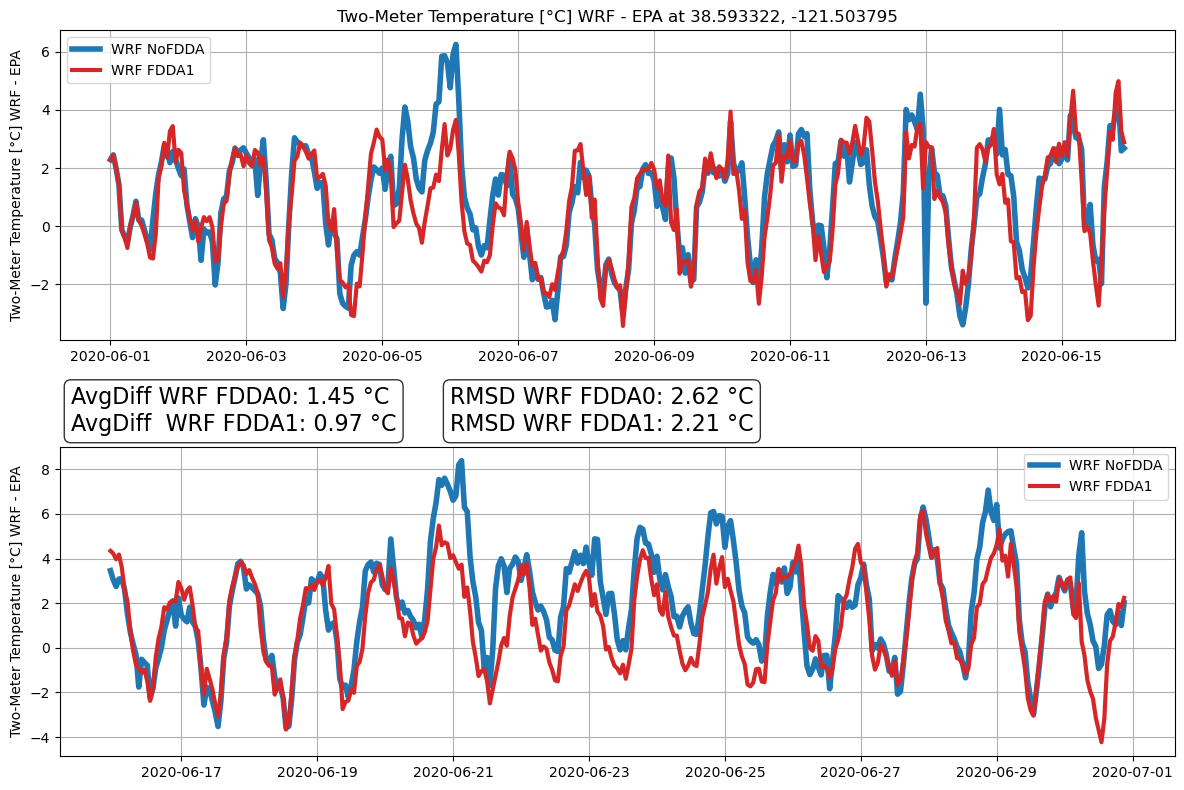

In [14]:
#### Let's plot the difference between the model and data instead.
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

#### Top subplot (first half)

axs[0].plot(Time_all[0:359], Var0_all[0:359]-EPAVar[0:359],linewidth=4, label="WRF NoFDDA", color='tab:blue')
axs[0].plot(Time_all[0:359], Var1_all[0:359]-EPAVar[0:359],linewidth=3,  label="WRF FDDA1", color='tab:red')
axs[0].set_ylabel(VarLabel + " WRF - EPA")
axs[0].set_title(VarLabel+ " WRF - EPA" +" at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(Time_all[359:718], Var0_all[359:718]-EPAVar[359:718],linewidth=4, label="WRF NoFDDA", color='tab:blue')
axs[1].plot(Time_all[359:718], Var1_all[359:718]-EPAVar[359:718],linewidth=3,  label="WRF FDDA1", color='tab:red')
axs[1].set_ylabel(VarLabel+ " WRF - EPA")
#axs[1].set_title(VarLabel +" at 38.593322, -121.503795")
axs[1].grid(True)
axs[1].legend()

# === Add the Mean Difference ======= #
MeanDiff0=np.mean(np.array(Var0_all) - np.array(EPAVar))
MeanDiff1=np.mean(np.array(Var1_all) - np.array(EPAVar))
axs[0].text(0.01, -0.15, 
            f"AvgDiff WRF FDDA0: {MeanDiff0:.2f} °C\nAvgDiff  WRF FDDA1: {MeanDiff1:.2f} °C",
            transform=axs[0].transAxes,
            fontsize=16,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# === Add RMS Deviation to the plot ===
rmsd0=np.sqrt(np.mean((np.array(Var0_all) - np.array(EPAVar)) ** 2))
rmsd1=np.sqrt(np.mean((np.array(Var1_all) - np.array(EPAVar)) ** 2))
axs[0].text(0.35, -0.15, 
            f"RMSD WRF FDDA0: {rmsd0:.2f} °C\nRMSD WRF FDDA1: {rmsd1:.2f} °C",
            transform=axs[0].transAxes,
            fontsize=16,
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
